# Titanic Data Comparison

[The legendary Titanic Machine Learning Competition](https://www.kaggle.com/c/titanic) has over 160,000 competitors using Machine Learning to predict the survivors from the 1912 crash of the oceanliner Titanic. 
Below is an outline of my submission that scored in the top 7%.

## Outline

-  [Understanding the Data](#understanding). Importing data and files, understanding the basics, visualizing the data, and basic data statistics.
- [Cleaning Data](#cleaning).  Combine data, impute missing data, convert categories to numeric, and remove outliers. 
- [Feature Engineering](#featureengineering). Create new features and tranform the given features.
- [Data Preprocessing](#datapreprocessing).  Separate data into train and test sets, choose the features to drop before modeling.
- [Creating Models](#basemodel).  Create a base model for comparison, create different types of models, tune the models, and build ensemble models.

<a id="understanding"></a>
# Understanding the Given Data

## Importing Libaries

In [1]:
# Import pandas for dataframes
import pandas as pd

# Import NumPy and math for math functions and calculations
import numpy as np
import math

# Import Operating System functions for finding the local directory
import os

# Import plotting library to display data
from matplotlib import pyplot as plt
import seaborn as sns

## Importing Data

In [2]:
# Input directory path
dir_name = os.path.dirname(os.path.abspath("TitanicSurvivalPrediction.ipyb"))

# Read training dataset from same directory as this file
data_file = os.path.join(dir_name, "train.csv")
df_train = pd.read_csv(data_file)

# Read test dataset from same directory as this file
test_data_file = os.path.join(dir_name, "test.csv")
df_test = pd.read_csv(test_data_file)

<a id="understandbasics"></a>
## Basic Structure

In [3]:
# Information on all columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# The first few rows
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("Number of passengers in training data:", 
      len(df_train), "and in test set", len(df_test))

Number of passengers in training data: 891 and in test set 418


Notice:
- Features Age and Cabin have missing values in the training set
- Features are integer, float, and string (object)
- 12 original features

<a id="visualizing"></a>
## Visualizing Data

### Visualizing Numeric Features

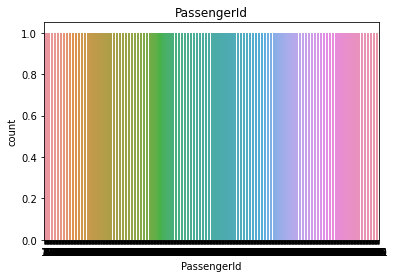

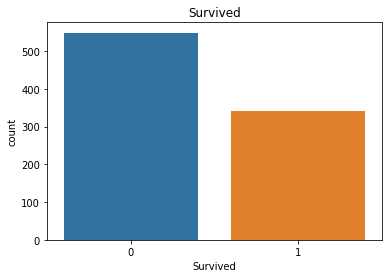

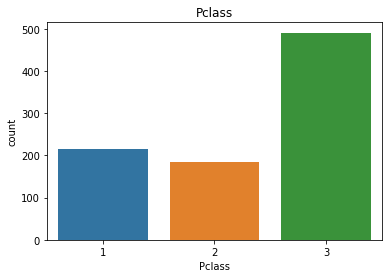

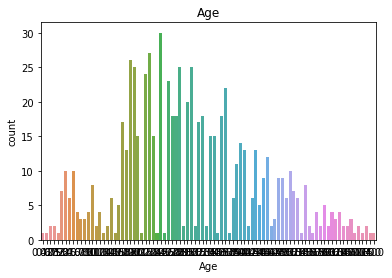

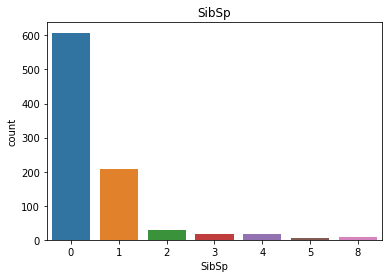

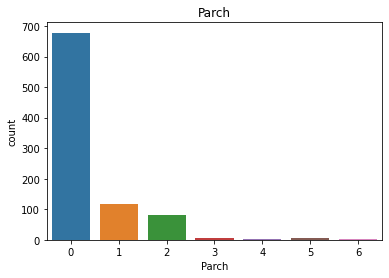

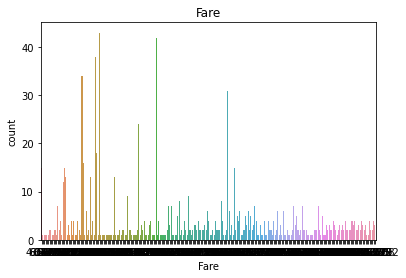

In [6]:
df_num = df_train.select_dtypes(include=np.number)
for col in df_num.columns:
    sns.countplot(df_train, x=col).set_title(col)
    plt.title(col)
    plt.show()

### Visualizing Categorical Features

We display the categorical columns other than Name (unique for every passenger) and Ticket (almost unique).

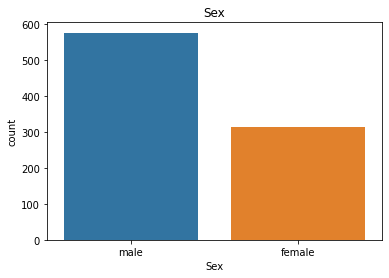

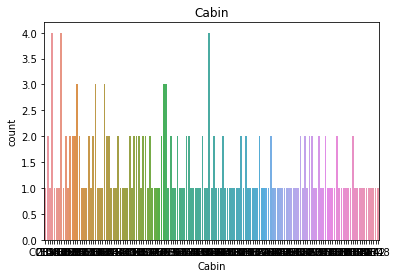

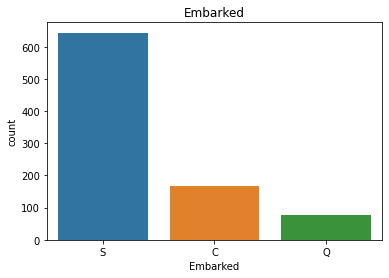

In [7]:
df_cat = df_train.describe(include=[object])
for col in [col for col in df_cat.columns if col not in ['Name', 'Ticket']]:
    # df_num[col].hist()
    sns.countplot(df_train, x=col).set_title(col)
    plt.show()

## Statistics

### Survival Rate

In [8]:
print("Training set is {:.2%} of the combined data set.".format(
    len(df_train)/(len(df_train) + len(df_test))))
print("Overall survival rate in training set: {:.2%}".format(
    df_train['Survived'].sum()/len(df_train)))

Training set is 68.07% of the combined data set.
Overall survival rate in training set: 38.38%


### Univariate Statistics

In [9]:
print("Statistics for numerical columns\n")
df_train.describe()

Statistics for numerical columns



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
print("Statistics for string columns\n")
df_train.describe(include=[object])

Statistics for string columns



,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Correlation Between Numeric Features

Absolute correlation between numeric features.


<AxesSubplot:>

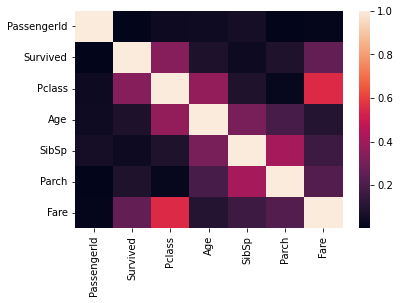

In [11]:
print("Absolute correlation between numeric features.")
sns.heatmap(df_num.corr().abs())

In [12]:
print("Top 10 pairwise correlations: ")
correlation_list = df_num.corr().abs().unstack().sort_values()
num_cols = len(df_num.columns)
print(correlation_list[-10 - num_cols:-num_cols])

Top 10 pairwise correlations: 
Age       SibSp       0.308247
SibSp     Age         0.308247
Survived  Pclass      0.338481
Pclass    Survived    0.338481
Age       Pclass      0.369226
Pclass    Age         0.369226
SibSp     Parch       0.414838
Parch     SibSp       0.414838
Fare      Pclass      0.549500
Pclass    Fare        0.549500
dtype: float64


Features Fare and Pclass have the highest absolute correlation (approximately 0.55).  The next highest absolute correlation is for features Parch and SibSp (approximately 0.41).

### Correlation of Features with Survived Feature

In [13]:
print("Correlation between numeric features and Survived feature,")
pd.pivot_table(df_train, index=['Survived'], 
               values=[col for col in df_num.columns 
                       if col not in ['Survived']])

Correlation between numeric features and Survived feature,


,Age,Fare,Parch,PassengerId,Pclass,SibSp
Survived,,,,,,
0,30.626179,22.117887,0.329690,447.016393,2.531876,0.553734
1,28.343690,48.395408,0.464912,444.368421,1.950292,0.473684


All of the numeric features show some difference in the average for survived and perished passengers.  In particular, the average Fare for survived passengers (48) is more than twice the average for perished passengers (22).

In [14]:
print("Survival Rate for different values of Pclass and Sex")
tmp_df = pd.pivot_table(df_train, index='Survived', 
                        columns=['Sex', 'Pclass'], 
                        values='PassengerId',aggfunc='count')
tmp_df.loc['Count'] = tmp_df.loc[0] + tmp_df.loc[1]
tmp_df.loc['Survival Rate'] = tmp_df.loc[1]/tmp_df.loc['Count']
tmp_df

Survival Rate for different values of Pclass and Sex


Sex               female                          male                        
Pclass                 1          2      3           1           2           3
Survived                                                                      
0               3.000000   6.000000   72.0   77.000000   91.000000  300.000000
1              91.000000  70.000000   72.0   45.000000   17.000000   47.000000
Count          94.000000  76.000000  144.0  122.000000  108.000000  347.000000
Survival Rate   0.968085   0.921053    0.5    0.368852    0.157407    0.135447

Notice that females in the 1st and 2nd classes had a high survival rate.

In [15]:
print("Survival Rate for different values of Parch and SibSp")
tmp_df = pd.pivot_table(df_train, index='Survived', 
                        columns=['Parch', 'SibSp'], 
                        values='PassengerId',aggfunc='count')
tmp_df.loc['Count'] = tmp_df.loc[0] + tmp_df.loc[1]
tmp_df.loc['Survival Rate'] = tmp_df.loc[1]/tmp_df.loc['Count']
tmp_df

Survival Rate for different values of Parch and SibSp


Parch                   0                                  1             \
SibSp                   0           1      2    3          0          1   
Survived                                                                  
0              374.000000   59.000000  12.00  NaN  13.000000  23.000000   
1              163.000000   64.000000   4.00  2.0  25.000000  34.000000   
Count          537.000000  123.000000  16.00  NaN  38.000000  57.000000   
Survival Rate    0.303538    0.520325   0.25  NaN   0.657895   0.596491   

Parch                                      2  ...              3            \
SibSp                 2    3    4          0  ...    5    8    0         1   
Survived                                      ...                            
0              1.000000  7.0  9.0   8.000000  ...  5.0  7.0  NaN  2.000000   
1              6.000000  NaN  NaN  21.000000  ...  NaN  NaN  1.0  1.000000   
Count          7.000000  NaN  NaN  29.000000  ...  NaN  NaN  NaN  3.000000   
Survival Rate  0.857143  NaN  NaN   0.724138  ...  NaN  NaN  NaN  0.333333   

Parch                 4         5              6  
SibSp            2    0    1    0         1    1  
Survived                                          
0              NaN  1.0  3.0  2.0  2.000000  1.0  
1              1.0  NaN  NaN  NaN  1.000000  NaN  
Count          NaN  NaN  NaN  NaN  3.000000  NaN  
Survival Rate  NaN  NaN  NaN  NaN  0.333333  NaN  

[4 rows x 24 columns]

<a id="cleaning"></a>
# Cleaning Data

<a id="combinedata"></a>
## Combining Data

First, combine the training and test sets into one dataset with a 'Set' column to differentiate between the two.  This allows us to update both datasets at once.

In [16]:
print("Combining Train and Test Data into one dataset.")
df_train['Set'] = 'train'
df_test['Set'] = 'test'
df_test['Survived'] = -1
df_all = pd.concat([df_train, df_test], ignore_index=True)

Combining Train and Test Data into one dataset.


<a id="handlemissing"></a>
## Handling Missing Data

In [17]:
print("Column has missing data?")
df_all.isna().any()

Column has missing data?


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
Set            False
dtype: bool

The combined dataset (including both training and test data sets) has missing information in the following features: Age, Fare, Cabin, and Embarked.

### Helper Function: Print_missing

In [18]:
# Prints number missing values and number of unique values
def print_missing(col):
    print(col, "Feature is missing",
          len(df_all[df_all[col].isnull()]), 'values', end="")
    print(" (out of", len(df_all), "passengers)")
    print("    and has", len(df_all[col].unique()), 
          "unique values.") 

### Missing Cabin Values

In [19]:
print_missing('Cabin')

Cabin Feature is missing 1014 values (out of 1309 passengers)
    and has 187 unique values.


Cabin is missing about 77% of its values.  However, knowing which values are missing might be useful.  We replace the missing values with the character 'Z'.

In [20]:
# Replace Missing Values with Z
df_all['Cabin'].fillna('Z', inplace=True)

### Missing Age Values

In [21]:
print_missing('Age')

Age Feature is missing 263 values (out of 1309 passengers)
    and has 99 unique values.


Age is missing about 20% of its values.  We plan to impute the missing values by using other features.  Below, we compare Age to Sex and Class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

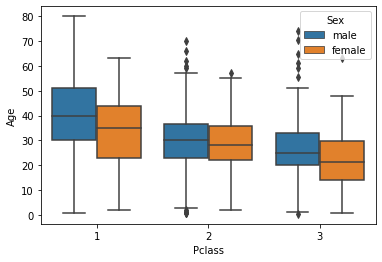

In [22]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df_all[df_all['Set'] == 'train'], hue='Sex')

We estimate each missing Age value by the median Age for passengers with the same Sex and Pclass values.

In [23]:
# We create a dictionary of medians indexed by (Sex, Pclass)
group_cols = ['Sex', 'Pclass']
median_dict = df_all[df_all['Age'].notnull()].groupby(group_cols)['Age'].median().astype(int).to_dict()
print(median_dict)

{('female', 1): 36, ('female', 2): 28, ('female', 3): 22, ('male', 1): 42, ('male', 2): 29, ('male', 3): 25}


We use the median dictionary to replace missing Age values.

In [24]:
# Function for transforming the Age feature into one with no missing values
def age_transform(row):
    if pd.isnull(row['Age']):
        return(median_dict[tuple(row[group_cols].tolist())])
    else:
        return row['Age']

In [25]:
# Update Age.
df_all['Age'] = df_all.apply(lambda row: age_transform(row), axis=1)

<AxesSubplot:xlabel='Age', ylabel='count'>

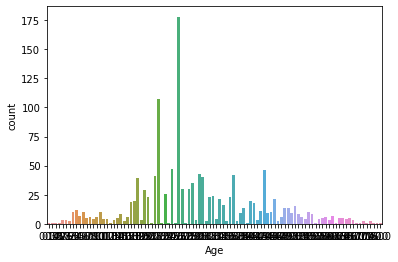

In [26]:
sns.countplot(df_all, x='Age')

### Missing Embarked 

In [27]:
print_missing('Embarked')

Embarked Feature is missing 2 values (out of 1309 passengers)
    and has 4 unique values.


In [28]:
# Since there are few missing values, it doesn't really matter what we replace them with
#   Replace missing Embarked values with most common value
df_all.Embarked.fillna('S', inplace=True)

### Other Missing Values

In [29]:
# Print any entries with missing values
df_all[df_all.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Set
1043,1044,-1,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Z,S,test


In [30]:
# Replace missing Fare value with a median
df_all.Fare.fillna(np.nanmedian(df_all[(df_all['Pclass'] == 3)]['Fare']), inplace=True)

<a id="convertcategories"></a>
## Converting Non-numeric Categories

Convert the Sex and Embarked features into numeric columns. 

In [31]:
# Sex feature mapped to 0 and 1
df_all['Sex'] = df_all['Sex'].map({'female':0, 'male':1})

In [32]:
# Embarked feature mapped to 0, 1, 2
df_all['Embarked'] = df_all['Embarked'].map({'S':-1, 'C':0, 'Q':1})

In [33]:
print("Current Features:\n")
df_all.info()

Current Features:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   int64  
 12  Set          1309 non-null   object 
dtypes: float64(2), int64(7), object(4)
memory usage: 133.1+ KB


## Removing Outliers

Finding outliers, manually choosing a survival prediction based on the training set, apply strategy to predict survived on the test set, and removing these outliers from the datasets.  The outlier-predict list keeps track of prediction on the test set outliers.

In [34]:
outlier_predict = pd.DataFrame({'PassengerId':[], 'Survived':[]})
display_cols = ['PassengerId', 'Survived', 'Sex', 'Pclass','SibSp', 'Parch', 'Age']

### Age Outliers

Text(0.5, 1.0, 'Age Feature of the Training Set')

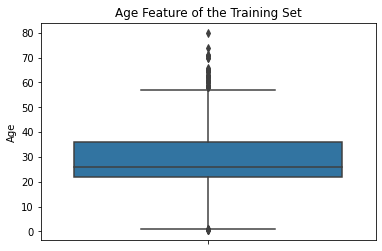

In [35]:
sns.boxplot(y = 'Age', data = df_all[df_all['Set'] == 'train']).set_title("Age Feature of the Training Set")

In [36]:
quartiles = df_train['Age'].quantile([0.25, 0.75])
q1, q3 = quartiles[0.25], quartiles[0.75]
irq = q3 - q1
lower_bound = q1 - 1.5 * irq
upper_bound = q3 + 1.5 * irq
print("Age feature has ", len(df_all[df_all['Age']< lower_bound]), 
      "values less than", round(lower_bound, 4))
print("    and ", len(df_all[df_all['Age']> upper_bound]), 
      "values greater than", round(upper_bound, 4))

Age feature has  0 values less than -6.6875
    and  13 values greater than 64.8125


In [37]:
df_tmp = df_all[df_all['Age'] > upper_bound]
df_tmp[display_cols].sort_values(['Sex', 'Pclass', 'Survived'])

,PassengerId,Survived,Sex,Pclass,SibSp,Parch,Age
987,988,-1,0,1,1,0,76.0
972,973,-1,1,1,1,0,67.0
54,55,0,1,1,0,1,65.0
96,97,0,1,1,0,0,71.0
456,457,0,1,1,0,0,65.0
493,494,0,1,1,0,0,71.0
745,746,0,1,1,1,1,70.0
630,631,1,1,1,0,0,80.0
33,34,0,1,2,0,0,66.0
672,673,0,1,2,0,0,70.0


In [38]:
# Make Predictions on the two outliers in the test set
#   We predict that 1st class women are the only survivors on this outlier set
outlier_predict = outlier_predict.append(pd.DataFrame({'PassengerId':[988, 973], 
                                                       'Survived':[1, 0]}), ignore_index=True)

# Remove all such outliers
df_all.drop(df_all[df_all['Age'] > upper_bound].index, inplace=True)

<a id="featureengineering"></a>
# Feature Engineering

### Cabin Feature: Deck
Deck is the first letter of the Cabin, with 
- missing values already replaced by Z
- low frequency (<= 20) values replaced by Y
- one-hot encoded

In [39]:
# Deck is the first character of Cabin
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0])

In [40]:
# Find Deck values that have low frequency
print("Deck values and counts\n", df_all['Deck'].value_counts().to_dict())

Deck values and counts
 {'Z': 1008, 'C': 92, 'B': 63, 'D': 46, 'E': 40, 'F': 21, 'A': 20, 'G': 5, 'T': 1}


In [41]:
# Replace low frequency Deck values with Y
value_counts = df_all['Deck'].value_counts()
to_remove = value_counts[value_counts <= 20].index
df_all['Deck'].replace(to_remove, 'Y',inplace=True)
print("New Deck values and counts\n", df_all['Deck'].value_counts().to_dict())

New Deck values and counts
 {'Z': 1008, 'C': 92, 'B': 63, 'D': 46, 'E': 40, 'Y': 26, 'F': 21}


In [42]:
# Add one-hot features
df_all = pd.get_dummies(data=df_all, columns=['Deck'], dtype=int)

### Feature: Title
- extract title from Name
- convert some rare titles to their most similar common title
- group the remaining rare titles into the title 'Other'
- convert title to one-hot vectors

Original Salutations: 
 {'Mr': 746, 'Miss': 260, 'Mrs': 196, 'Master': 61, 'Rev': 8, 'Dr': 8, 'Col': 4, 'Major': 2, 'Mlle': 2, 'Ms': 2, 'Lady': 1, 'Sir': 1, 'Mme': 1, 'Don': 1, 'the Countess': 1, 'Jonkheer': 1, 'Dona': 1}


<AxesSubplot:>

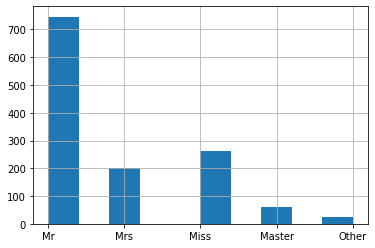

In [43]:
df_all['Title'] = df_all.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
print("Original Salutations: \n", df_all['Title'].value_counts().to_dict())

sal_to_sal = {'Mr': 'Mr', 'Miss': 'Miss', 'Mrs':'Mrs', 'Master':'Master', 
              'Mlle':'Miss', 'Mme':'Mrs', 'the Countess':'Mrs', 'Ms':'Mrs', 
              'Lady':'Mrs', 'the Countess':'Mrs', 'Dona':'Mrs', 'Other':'Other'}
df_all['Title'] = df_all['Title'].apply(lambda x: sal_to_sal[x] if (x in sal_to_sal.keys()) else sal_to_sal['Other'])
df_all['Title'].hist()


In [44]:
df_all = pd.get_dummies(data=df_all, columns=['Title'], dtype=int)

### Feature: Family

In [45]:
df_all['Family'] = df_all.Parch + df_all.SibSp + 1

In [46]:
print("Survival Rate for different values of Family")
tmp_df = pd.pivot_table(df_all[df_all['Set']=='train'], index='Survived', 
                        columns=['Family'], values='PassengerId',aggfunc='count')
tmp_df.loc['Count'] = tmp_df.loc[0] + tmp_df.loc[1]
tmp_df.loc['Survival Rate'] = tmp_df.loc[1]/tmp_df.loc['Count']
display(tmp_df)

Survival Rate for different values of Family


Family,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,366.000000,71.00000,42.000000,8.000000,12.0,19.000000,8.000000,6.0,7.0
1,162.000000,89.00000,59.000000,21.000000,3.0,3.000000,4.000000,NaN,NaN
Count,528.000000,160.00000,101.000000,29.000000,15.0,22.000000,12.000000,NaN,NaN
Survival Rate,0.306818,0.55625,0.584158,0.724138,0.2,0.136364,0.333333,NaN,NaN


### Feature: HighClassF

In [47]:
df_all['HighClassF'] = np.where((df_all['Sex'] == 0) & 
                                (df_all['Pclass'] == 1), 1, 0)

In [48]:
print("Survival Rate for different values of Pclass and Sex")
tmp_df = pd.pivot_table(df_all[df_all['Set']=='train'], index='Survived', 
                        columns=['Sex', 'Pclass'], 
                        values='PassengerId',aggfunc='count')
tmp_df.loc['Count'] = tmp_df.loc[0] + tmp_df.loc[1]
tmp_df.loc['Survival Rate'] = tmp_df.loc[1]/tmp_df.loc['Count']
display(tmp_df)

Survival Rate for different values of Pclass and Sex


Sex                    0                            1                        
Pclass                 1          2      3          1           2           3
Survived                                                                     
0               3.000000   6.000000   72.0   72.00000   89.000000  297.000000
1              91.000000  70.000000   72.0   44.00000   17.000000   47.000000
Count          94.000000  76.000000  144.0  116.00000  106.000000  344.000000
Survival Rate   0.968085   0.921053    0.5    0.37931    0.160377    0.136628

<a id="#datapreprocessing"></a>
# Preprocessing Datasets


- Separate Data Sets
- Remove non-numeric features
- Remove Low-impact features
- Weigh training set by test set weights
- Scale features

## Import Preprocessing Libraries

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.model_selection import LearningCurveDisplay, StratifiedKFold
from sklearn.model_selection import cross_val_score

## Remove Categorical Features

In [50]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1308
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1296 non-null   int64  
 1   Survived      1296 non-null   int64  
 2   Pclass        1296 non-null   int64  
 3   Name          1296 non-null   object 
 4   Sex           1296 non-null   int64  
 5   Age           1296 non-null   float64
 6   SibSp         1296 non-null   int64  
 7   Parch         1296 non-null   int64  
 8   Ticket        1296 non-null   object 
 9   Fare          1296 non-null   float64
 10  Cabin         1296 non-null   object 
 11  Embarked      1296 non-null   int64  
 12  Set           1296 non-null   object 
 13  Deck_B        1296 non-null   int64  
 14  Deck_C        1296 non-null   int64  
 15  Deck_D        1296 non-null   int64  
 16  Deck_E        1296 non-null   int64  
 17  Deck_F        1296 non-null   int64  
 18  Deck_Y        1296 non-null 

In [51]:
# Remove Categorical Columns except Set
df_all.drop(columns=['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

## Separate Data Sets

In [52]:
X_train = df_all[df_all['Set'] == 'train'].copy()
X_test = df_all[df_all['Set'] == 'test'].copy()
y_train = X_train['Survived'].copy().astype(int)

In [53]:
# Keep track of PassengerId
train_passengerids = X_train['PassengerId'].copy()
test_passengerids = X_test['PassengerId'].copy()

In [54]:
# Remove Set and Survived Columns
remove_cols = ['Set', 'Survived']
X_train.drop(columns=remove_cols, axis=1, inplace=True)
X_test.drop(columns=remove_cols, axis=1, inplace=True)

## Compare Dataset Distributions
We compare the feature means and standard deviation between the training and test sets.  Any significant differences could affect the results. 

In [55]:
# Show the difference between Train and Test means and std
distributions = pd.DataFrame({'X_train mean': round(X_train.mean(),4), 
                              'X_test mean': round(X_test.mean(),4),
                              'Scaled Mean Diff': round(abs(X_train.mean() - X_test.mean())/X_train.std(),4),
                              'X_train std': round(X_train.std(),4),                              
                              'X_test std': round(X_test.std(),4),                             
                             'Scaled Std Diff': round(abs(X_train.std() - X_test.std())/X_train.std(),4)})
distributions.sort_values(['Scaled Mean Diff'])

,X_train mean,X_test mean,Scaled Mean Diff,X_train std,X_test std,Scaled Std Diff
Title_Mr,0.5761,0.5745,0.0033,0.4945,0.4950,0.0011
Deck_Y,0.0205,0.0192,0.0086,0.1416,0.1375,0.0292
Parch,0.3841,0.3942,0.0125,0.8096,0.9834,0.2147
Sex,0.6432,0.6370,0.0129,0.4793,0.4814,0.0044
Title_Master,0.0455,0.0505,0.0241,0.2084,0.2192,0.0517
Deck_Z,0.7739,0.7861,0.0291,0.4186,0.4106,0.0191
Deck_D,0.0375,0.0312,0.0329,0.1901,0.1742,0.0836
HighClassF,0.1068,0.1178,0.0355,0.3091,0.3227,0.0443
Deck_B,0.0511,0.0433,0.0357,0.2204,0.2037,0.0757
Deck_F,0.0148,0.0192,0.0369,0.1207,0.1375,0.1391


In [56]:
print("Features with the highest mean difference btween train and test sets:")
print([x for x in distributions.axes[0] if distributions.loc[x,'Scaled Mean Diff'] > 0.07])

Features with the highest mean difference btween train and test sets:
['PassengerId', 'SibSp', 'Embarked', 'Deck_E', 'Title_Mrs', 'Title_Other']


## Scaling Features

In [57]:
# For Gender-Based Baseline Model, need feature Sex unscaled
train_sex = X_train['Sex'].copy()
test_sex = X_test['Sex'].copy()

# Scaled Features
scaler = StandardScaler()
scale_cols = X_train.columns
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [58]:
print(scale_cols)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_Y',
       'Deck_Z', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Other', 'Family', 'HighClassF'],
      dtype='object')


## Feature Selection
Remove features with low correlation with survival, with high correlation with other features, and with low importance.

### Recursive Feature Elimination For Random Forest
Code copied from [sklearn manual on RFECV](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py)

In [59]:
min_features_to_select = 1 # Minimum number of features to consider
clf = RandomForestClassifier(random_state=43)
cv = StratifiedKFold(5, shuffle=True, random_state=43)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 7


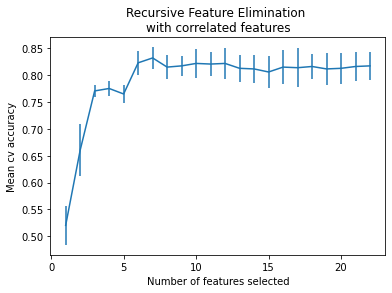

In [60]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean cv accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

The optimal number of features for a Random Forest is 7.  The graph shows that any number of features greater than 7 would also work well.  We use the ranking obtained from recursive feature elimination to take the top 10 features in case the other models work better with more features.

In [61]:
cols = np.array(X_train.columns)
print("Original Number of Features:", len(cols))

ranking = rfecv.ranking_
mask = np.where(ranking < 5, True,False)
keep_cols = cols[mask]
print("Features Remaining After Masking:", len(keep_cols))

Original Number of Features: 22
Features Remaining After Masking: 10


In [62]:
X_train = X_train[keep_cols]
X_test = X_test[keep_cols]

# Models

## Import Model Libraries

In [82]:
# Import optimization functions
from sklearn.metrics import accuracy_score 
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Import classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier


In [83]:
performance_df = pd.DataFrame({'Model':[], 'CV Acc': [], 'Delta1':[],
                           'Tuned CV':[], 'Delta2':[]})

### Helper Functions

In [84]:
# Report best parameters
def best_params(classifier, model_name):
    print(model_name)
    print("    Best Parameters: "+ str(classifier.best_params_))

In [85]:
# Write the prediction to a file
def write_to_file(survival, name):
    prediction = pd.DataFrame({'PassengerId': test_passengerids, 'Survived': survival})
    prediction = prediction.append(outlier_predict,ignore_index=True).sort_values(['PassengerId'])
    prediction['Survived'] = prediction['Survived'].astype(int)
    prediction['PassengerId'] = prediction['PassengerId'].astype(int)
    prediction.to_csv(name +'.csv', index=False)

In [86]:
def update_performance(model, step, name):
    global performance_df
    
    # Calculate percent accuracy
    train_per = round(accuracy_score(model.predict(X_train), y_train)*100, 2)
    cv_list = cross_val_score(model,X_train,y_train,cv=5)
    cv_per = round(cv_list.mean()* 100, 2)
    delta_per = round(train_per - cv_per, 2)
    
    # Update performance_df
    if step == 1:
        performance_df = performance_df.append({'Model': name, 
                                                'CV Acc': str(cv_per)+'%',
                                                'Delta1': str(delta_per)+'%'}, ignore_index=True)
    elif step == 2:            
        print("    CV acc:", str(cv_per)+'%', "Delta:",str(round(delta_per, 2))+'%')
        performance_df.loc[performance_df['Model'] == name, 'Tuned CV'] = str(cv_per)+'%'
        performance_df.loc[performance_df['Model'] == name, 'Delta2'] = str(round(delta_per, 2))+'%'
    else: # step == 3
        performance_df = performance_df.append({'Model': name,
                                                'Tuned CV': str(cv_per)+'%',
                                                'Delta2': str(delta_per)+'%'}, ignore_index=True)

<a id="baseline"></a>
## Baseline: Gender-Based Model
On the non-outliers, predict survival if the passenger is female and perished otherwise.
This produces a baseline that all the models should beat.

In [87]:
# Calculate accuracy on the training set
train_prediction = pd.DataFrame({'PassengerId': train_passengerids, 
                                 'Survived': (1- train_sex)})
train_per = round(accuracy_score(y_train, 
                                 train_prediction['Survived'])*100, 2)
 
# Print accuracy and save to performance_df
print("Gender-based Baseline Accuracy:", str(train_per))
performance_df = performance_df.append({'Model':'Gender-Based', 
                                        'CV Acc': str(train_per)+'%', 'Delta1': str(0)+'%',
                                        'Tuned CV': str(train_per)+'%', 'Delta2': str(0)+'%'}, 
                                       ignore_index=True)

# Write test set prediction to file
write_to_file(1-test_sex, "Gender Based")

Gender-based Baseline Accuracy: 78.52


<a id="architecture"></a>
# Choose Model Architecture

Model ideas from [Ken Jee](https://www.kaggle.com/code/kenjee/titanic-project-example)

## Explore Architectures

In [88]:
# Models
gnb = GaussianNB(var_smoothing=.0001)
lr = LogisticRegression(max_iter=200, C=2.0)
rfc = RandomForestClassifier(n_estimators=100, min_samples_leaf=0.1,
                             max_depth=5, max_features=0.5)
# List of Models
classifiers = [('Gaussian NB', gnb),  ('Logistic Reg', lr), 
               ('Random Forest', rfc)]

LEARNING CURVES


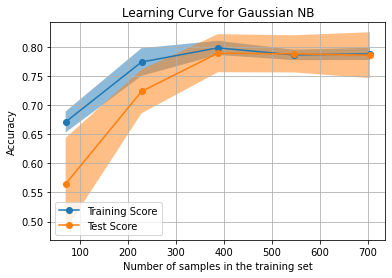

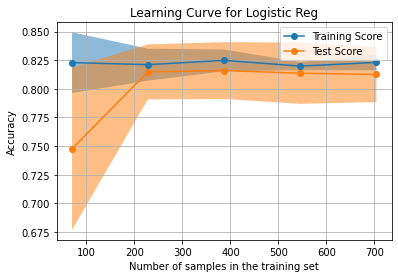

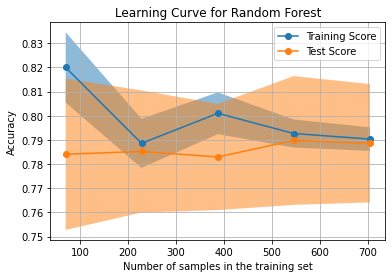

In [89]:
# Learning Curves
print("LEARNING CURVES")
common_params = {
    "X": X_train,
    "y": y_train, 
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": StratifiedKFold(5, shuffle=True, random_state=43),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy"
}

for name, classifier in classifiers:
    LearningCurveDisplay.from_estimator(classifier, **common_params)
    plt.title("Learning Curve for " + name)
    plt.legend(["Training Score", "Test Score"])
    plt.grid()
    plt.show()

In [90]:
for name, classifier in classifiers:
    
    # Fit each model to the training data (without outliers) 
    model = classifier
    model.fit(X_train, y_train)
    
    # Update the performance_df
    update_performance(model, 1, name)   

In [91]:
performance_df.sort_values(['CV Acc'])  

,Model,CV Acc,Delta1,Tuned CV,Delta2
0,Gender-Based,78.52%,0%,78.52%,0%
3,Random Forest,78.52%,0.68%,NaN,NaN
1,Gaussian NB,78.64%,0.0%,NaN,NaN
2,Logistic Reg,81.14%,0.91%,NaN,NaN


In [92]:
# This voting classifier averages the results of the other models
voting_clf = VotingClassifier(estimators = classifiers, voting='soft')
voting_clf.fit(X_train,y_train)
update_performance(voting_clf, 1, "VotingBasic")
update_performance(voting_clf, 2, "VotingBasic")

# Predict voting values on X_test
base_voting_predict = voting_clf.predict(X_test).astype(int)

# Write test set prediction to file
write_to_file(base_voting_predict, "VotingBasic")

    CV acc: 79.77% Delta: 0.57%


In [93]:
performance_df.sort_values(['CV Acc'])

,Model,CV Acc,Delta1,Tuned CV,Delta2
0,Gender-Based,78.52%,0%,78.52%,0%
3,Random Forest,78.52%,0.68%,NaN,NaN
1,Gaussian NB,78.64%,0.0%,NaN,NaN
4,VotingBasic,79.55%,0.79%,79.77%,0.57%
2,Logistic Reg,81.14%,0.91%,NaN,NaN


In [94]:
# Predict voting values on X_test
voting_prediction = voting_clf.predict(X_test).astype(int)
write_to_file(voting_prediction, 'Voting')

## Fine-tune Models

### Fine-Tune Parameters

In [95]:
gnb_params = {'var_smoothing': np.logspace(0,-9, num=10)}
lr_params = {'solver':['liblinear', 'lbfgs'],
             'max_iter' : [150, 200, 250], 
             'penalty' : ['l2'], 
             'C' : [0.5, 1.0, 2.0]} 
rf_params =  {'n_estimators': [100, 400],
               'max_depth': [10, None],
               'max_features': ['sqrt', 10],
               'min_samples_leaf': [1, 2]}
param_list = [gnb_params, lr_params, rf_params]
model_dict = {}

### Fine-Tune Models

In [96]:
for i in range(len(classifiers)):
    name, classifier = classifiers[i]
    params = param_list[i]
    
    # Fit the model
    clf = GridSearchCV(classifier, param_grid = params, cv = 5, n_jobs = -1)
    best_clf = clf.fit(X_train, y_train)
    
    # Record the model
    model_dict[name] = best_clf    
    best_params(best_clf, name)
    
    # Save accuracy results and print
    update_performance(best_clf, 2, name)
    print("    Train acc:", str(train_per),"% CV acc:", str(cv_per), "% Delta:",str(round(delta_per, 2)), '%')

    # Write prediction to file
    y_hat = best_clf.predict(X_test).astype(int)
    write_to_file(y_hat, 'predict_'+ name)

Gaussian NB
    Best Parameters: {'var_smoothing': 0.01}
    CV acc: 78.52% Delta: 0.12%
    Train acc: 78.52 % CV acc: 79.43 % Delta: 13.64 %
Logistic Reg
    Best Parameters: {'C': 0.5, 'max_iter': 150, 'penalty': 'l2', 'solver': 'liblinear'}
    CV acc: 81.14% Delta: 0.79%
    Train acc: 78.52 % CV acc: 79.43 % Delta: 13.64 %
Random Forest
    Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 400}
    CV acc: 82.73% Delta: 10.79%
    Train acc: 78.52 % CV acc: 79.43 % Delta: 13.64 %


In [97]:
performance_df.sort_values(['Tuned CV'])

,Model,CV Acc,Delta1,Tuned CV,Delta2
0,Gender-Based,78.52%,0%,78.52%,0%
1,Gaussian NB,78.64%,0.0%,78.52%,0.12%
4,VotingBasic,79.55%,0.79%,79.77%,0.57%
2,Logistic Reg,81.14%,0.91%,81.14%,0.79%
3,Random Forest,78.52%,0.68%,82.73%,10.79%


## Ensemble Models

### Voting on the Tuned Models

In [98]:
# Choose voting model based on top three classifiers
estimators = [(name, model_dict[name].best_estimator_) for name, _ in classifiers]
voting_clf = VotingClassifier(estimators = estimators, voting = 'soft') 

# Fit model
voting_clf.fit(X_train,y_train)

# Update performance_df
update_performance(voting_clf, 2, name)

# Write prediction on test set to file
y_hat = voting_clf.predict(X_test).astype(int)
write_to_file(y_hat, "VotingTuned")

    CV acc: 81.02% Delta: 3.87%


### Grid Search Voting on the Tuned Models

In [99]:
# Use a grid search to optimize weighting in voting classifier
params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],
                       [2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

# Fit model
voting_clf2 = GridSearchCV(voting_clf, param_grid = params, cv = 5, n_jobs = -1)
voting_clf2.fit(X_train, y_train)

# Update performance
best_params(voting_clf2, "VotingWeighted")
update_performance(voting_clf2, 3, "VotingWeighted")

# Write prediction on test set to file
y_hat = voting_clf2.predict(X_test).astype(int)
write_to_file(y_hat, "VotingWeighted")

VotingWeighted
    Best Parameters: {'weights': [1, 2, 2]}


In [100]:
performance_df.sort_values("Tuned CV")

,Model,CV Acc,Delta1,Tuned CV,Delta2
0,Gender-Based,78.52%,0%,78.52%,0%
1,Gaussian NB,78.64%,0.0%,78.52%,0.12%
4,VotingBasic,79.55%,0.79%,79.77%,0.57%
3,Random Forest,78.52%,0.68%,81.02%,3.87%
2,Logistic Reg,81.14%,0.91%,81.14%,0.79%
5,VotingWeighted,NaN,NaN,82.05%,4.31%
